# Week 9 - Introduction to Neural Networks



<hr style="border:2px solid gray">

# Outline



1. [Section One: Basics of Neural Networks](#section-one-basics-of-neural-networks#)
1. [Section Two: Introduction to PyTorch](#section-two-introduction-to-pytorch)
1. [Section Three: Activation Functions](#section-three-activation-functions)
1. [Section Four: Exercises](#section-four-exercises)

<hr style="border:2px solid gray">

# Section One: Basics of Neural Networks

You have likely heard of neural networks before, as they are a common and versatile form of machine learning. The basic structure of these algorithms is inspired by the networks of neurons that can be found in our brains (hence *neural* networks). The possible applications of these algorithms are very broad, as the general structure is very versatile, powerful, and scalable. These algorithms are what comprise the idea of **deep learning**, which we will discuss in more detail later. 

We will start by discussing the building blocks of neural networks.

## Neural network components

The basic unit of a neural network is called a **neuron**. A single neuron takes a set of inputs and produces an output, according to the **weights** and **bias** of that neuron. In other words, it takes a weighted combination of its inputs, adds a bias, and outputs the result. A schematic illustrating the action of a single neuron with three inputs can be seen in the figure below.

<img src="Week9_plots/single_neuron_schematic_bias.png" height=400 align="center"/>

*Calculation of a single neuron output with three inputs, where each input has a weight $W_i$ and the weighted sum has a bias $b$ added to it.*


Of course, a single neuron is limited in what it can possibly predict; it can only find linear combinations of the inputs depending on the weights. In other words, a single neuron acts as a straight line in the input space. We can extend the power of these models by arranging individual neurons into **layers**. 

In this case, we say that a given layer has a matrix of weights and a vector of biases, where each row of the weight matrix corresponds to one of the input neutrons for that layer and each column corresponds to one of the output neurons in the layer. 

We can stack multiple layers such that the outputs of one layer are the inputs to the next layer. The name **deep learning** comes from the idea of having a deep neural network with many layers. We call different layers of neurons specific things:

* The first layer of neurons is called the **input layer**
<br>

* The last layer of neurons is called the **output layer**
<br>

* Layers of neurons between the input and output layers are called **hidden layers**
<br>



Of course, just having a set of weights and biases isn't enough to actually make predictions on data. Like all machine learning algorithms, we have to train the network with some training data.

## Neural network training



Neural networks can be applied to both classification and regression problems, depending only on the choice of **loss function**. As we have discussed before, a loss function is the function we want to optimise when we train a network. 

What does training a neural network mean? We want to vary the values of the weights and the biases at each of our neutrons, to minimise some **loss function** that is specific to our problem and measures how good the predictions of the network are. We do this tuning to minimise the loss function for our training data, and we can then evaluate the model performance on test data for a test of how well the model can **generalise**. 

There are many ways we can optimise our neural network to fit our training data. One of the most common choices is gradient descent, as we discussed in Week 4. 

<hr style="border:2px solid gray">

# Section Two: Introduction to PyTorch [^](#outline)

So far we have discussed the theoretical background to how we can define and train a neural network. In practise, we will use the python library PyTorch. There are several other Python libraries for neural networks, including Keras and Tensorflow, but in this course we will use PyTorch as it is arguably the most seamless package for building neural networks.

We import the library by importing `torch`. We will also import `torch.nn`, which has many of the neural network components.

In [1]:
import torch
import torch.nn as nn

torch.manual_seed(31337) # setting seed for reproducibility

We will first begin by talking about the general data framework of PyTorch, before we discuss how we can actually build neural networks.

## Tensors

The fundamental data structure used in PyTorch is the `tensor`. These are very similar to numpy arrays, and in fact intentionally implements many similar methods. Much like numpy arrays, data structures of any diemsnion can be tensors:

* Scalars - Rank 0 Tensors
<br>

* Vectors - Rank 1 Tensors
<br>

* Matrices - Rank 2 Tensors etc

We can create tensors in the same way as we would with a numpy array, just using `torch.tensor()` instead of `numpy.array()`. 

A single tensor can only store one datatype, so the type of data stored in a given tensor is a property of that tensor. You can specify the datatype of a tensor when you create it using the `dtype` argument. You can see a list of datatype options in the [documentation](https://pytorch.org/docs/stable/tensors.html#data-types).



In [2]:
X_int = torch.tensor([1,2,3,4],dtype = torch.int) # 32 bit integer
X_float = torch.tensor([1,2,3,4],dtype = torch.float) # 32 bit float
X_bool = torch.tensor([0,1,1,0], dtype = torch.bool) # Boolean

print(X_int)
print(X_float)
print(X_bool)

tensor([1, 2, 3, 4], dtype=torch.int32)
tensor([1., 2., 3., 4.])
tensor([False,  True,  True, False])


Much like in numpy, there are methods to create tensors that are empty, all 0s, all 1s, and with random values. 

In [3]:
empty = torch.empty(3,5) # Empty array of shape (3, 5)
ran = torch.rand(2, 4) # 
zeros = torch.zeros(2,3,4) # Array of 0s of shape (2, 3, 4)
ones = torch.ones(6) # Array of 1s of shape (6,)

print('Empty tensor with shape {}: \n\n {}\n'.format(empty.shape, empty))
print('Random tensor with shape {}: \n\n {}\n'.format(ran.shape, ran))
print('Zeros tensor with shape {}: \n\n {}\n'.format(zeros.shape, zeros))
print('Ones tensor with shape {}: \n\n {}\n'.format(ones.shape, ones))

Empty tensor with shape torch.Size([3, 5]): 

 tensor([[7.7700e-26, 6.2918e-43, 7.7700e-26, 6.2918e-43, 7.7700e-26],
        [6.2918e-43, 7.7700e-26, 6.2918e-43, 7.7700e-26, 6.2918e-43],
        [7.7700e-26, 6.2918e-43, 7.7700e-26, 6.2918e-43, 7.7700e-26]])

Random tensor with shape torch.Size([2, 4]): 

 tensor([[0.7941, 0.4809, 0.4088, 0.4594],
        [0.9966, 0.4029, 0.8646, 0.1313]])

Zeros tensor with shape torch.Size([2, 3, 4]): 

 tensor([[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]])

Ones tensor with shape torch.Size([6]): 

 tensor([1., 1., 1., 1., 1., 1.])



An important keyword we can (and often need to) specify is `requires_grad`. The default value is `False`, but it *must* be set to `True` for any tensors that will be involved in the training process, as we need to be able to calculate gradients throughout our network for the optimisation of the loss function. 

In [4]:
print(torch.tensor([8,9]).requires_grad)

False


<div style="background-color: #FFF8C6">

If your computer has a GPU, PyTorch has a function to check whether CUDA is available (which is important for GPU acceleration of neural network training, which you can read more about [here](https://blogs.nvidia.com/blog/2012/09/10/what-is-cuda-2/)).

In [5]:
torch.cuda.is_available()

False

## Linear Layers



In PyTorch, the standard method to construct a neural network is using so-called **linear layers**, which we construct by specifying the number of inputs and the number of outputs for that layer. We do this using `nn.linear`. 

In [6]:
inputs = 2
outputs = 1

linear = nn.Linear(inputs, outputs) # Layer that takes in 2 inputs and produces 1 output

By defining a layer this way, it will generate random weights and biases for each neuron in the layer; in this case, we have one neuron with two inputs, so we should have two weights and one bias. We can manually inspect the weights and biases of a linear layer using `Linear.weight` and `Linear.bias` respectively:

In [7]:
print(linear.weight)
print(linear.bias)

Parameter containing:
tensor([[-0.5175,  0.3412]], requires_grad=True)
Parameter containing:
tensor([0.6485], requires_grad=True)


We can see that we have the weights we expect, but also both have default to `requires_grad = True`. This is default behaviour for `nn.Linear`; because these tensors are included in a neural network, we must have gradients so we can train the network.

The `nn.Linear` object has a default call mechanism when we pass it a tensor. We can call it on a rank 1 tensor of length 2 (i.e. two input features), and produce a scalar output:

In [8]:
linear(torch.Tensor([1,1]))

tensor([0.4722], grad_fn=<AddBackward0>)

We can also pass larger input tensors like our training data, where the number of rows is the number of samples and the number of columns is the number of input features. We should then produce an output tensor of shape (`n_samples`,). Here is an example for 20 samples with 2 input features each:

In [9]:
rt = torch.randn(20, 2)

print(linear(rt))
print('Shape of output: {}'.format(linear(rt).shape))

tensor([[ 1.0998],
        [ 0.2963],
        [ 0.6787],
        [ 0.2084],
        [ 0.2669],
        [ 1.1483],
        [ 2.1167],
        [-0.2681],
        [ 0.4009],
        [ 1.0082],
        [ 1.6553],
        [ 1.3626],
        [ 0.6214],
        [ 1.0238],
        [ 0.4633],
        [ 1.3597],
        [ 0.7137],
        [ 0.6255],
        [-0.0394],
        [ 0.5666]], grad_fn=<AddmmBackward0>)
Shape of output: torch.Size([20, 1])


## Assembling a model

Of course, in general we wish to include more than one layer in our model. We can neatly assemble multiple layers together using `nn.Sequential`, which will pass the outputs from each layer as the input into the next layer. This is very convenient to scale our model to more layers.

The cell below has an example with two layers, with 20 features in the training data and a single output feature.


In [10]:
model = nn.Sequential(nn.Linear(20,10),
                      nn.Linear(10,1))

print(model)

Sequential(
  (0): Linear(in_features=20, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=1, bias=True)
)


We can put more than just linear layers into a `Sequential`, as we will see later on and next week. 

It is also possible to access individual layers in a `Sequential`, by indexing:

In [11]:
print(model[0]) # Get the first layer
print(model[1]) # Get the second layer

Linear(in_features=20, out_features=10, bias=True)
Linear(in_features=10, out_features=1, bias=True)


<div style="background-color: #FFF8C6">

There are alternative ways to build arbitrary models in PyTorch by constructing a Python class, but this is considerably more complicated and isn't necessary for simple architectures such as these.

Calling the model is exactly the same as calling a single layer, i.e. so long as we pass a tensor with the right number of features (regardless of how many samples) we will get out an output with a single value for each sample.

In [12]:
model(torch.randn(5,20)) # 5 samples, 20 input features

tensor([[ 0.1905],
        [-0.2133],
        [ 0.1545],
        [ 0.1588],
        [-1.1454]], grad_fn=<AddmmBackward0>)

## Loss functions and optimizers using PyTorch

We will work through a simple example of a neural network training here, where we will use the sklearn function `make_classification` to generate some simple classification data.

In [13]:
from sklearn.datasets import make_classification
import numpy as np

n_samples = 200
np.random.seed(42)

X, y = make_classification(n_features = 2, n_redundant = 0, n_samples = n_samples, n_informative = 2, random_state = 1, n_clusters_per_class = 1, class_sep=3)

X = torch.tensor(X).float()
y = torch.tensor(y).float()


We will define a model with the right sized inputs to try to fit this data, with just a single linear layer. Because we are trying to solve a binary classification problem, we need the outputs to be between 0 and 1. To accomplish this, we will add a so-called **activation function** to our network, where we will use a sigmoid function. We will discuss activation functions in more detail later.

In [14]:
model = nn.Sequential(nn.Linear(2,1), # 2 input values because we have 2 features in our data
                      nn.Sigmoid()) 

To train a neural network using PyTorch, we need to define a loss function. PyTorch implements a large number of common loss functions for both classification and regression, which you can read about in more detail in the [documentation](https://pytorch.org/docs/stable/nn.html#loss-functions). For this classification problem, we will use the binary cross entropy, which is implemented as `BCELoss`. You can read more about this in the [documentation](https://pytorch.org/docs/stable/generated/torch.nn.BCELoss.html#torch.nn.BCELoss) for `BCELoss`.

In [15]:
loss_fcn = nn.BCELoss()

We must also define what **optimizer** we are going to use. This is a PyTorch object in `torch.optim` that defines what the algorithm used to optimise the model loss function is. Each algorithm has different parameters, which are therefore hyperparameters of the neural network. We will use **stochastic gradient descent** in this example, which is implemented in PyTorch as `SGD`.

When we initialise an optimizer, we must point it to the parameters of the model we are going to train; we do this by passing `model.parameters()` as an argument. Here we also specify the learning rate `lr = 0.02`. 


In [16]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.02)

## Datasets and DataLoaders

PyTorch implements two useful structures for managing data that we use to train a neural network, called **Datasets** and **DataLoaders**. These work as follows:

* A Dataset collects inputs and targets together, so indexing a Dataset gives you an input-target pair
<br>

* A DataLoader is an iterable object that "wraps" access to a Dataset, allowing for easy access to data, especially in batches (which is important for stochastic gradient descent). 

A DataLoader requires us to pass it a Dataset object so it can access pairs of inputs and targets. It also has a lot of other useful features, including:

* Automatic shuffling of data to randomize the order in which data is shown to the network during training (helps prevent minimisation getting stuck in a local minimum)
<br>

* Efficient parallelization of data loading across CPU cores or GPUs
<br>

You can read more about data processing methods in PyTorch in the [documentation](https://pytorch.org/docs/stable/data.html).

We will use `TensorDataset` to define our dataset, and then define a `DataLoader`. There are a number of different types of Dataset that you can read about in the [documentation](https://pytorch.org/docs/stable/data.html#torch.utils.data.Dataset).



<div style="background-color: #FFF8C6">

You can also create custom `Dataset` classes, if you have additional functionality you want that isn't included in one of the base types. 

In [17]:
from torch.utils.data import TensorDataset, random_split

dataset = TensorDataset(X, y)
dataset_train, dataset_test = random_split(dataset, lengths = [0.8,0.2]) # Split dataset into separate datasets for training & testing


We can use the `random_split` function from PyTorch to split a Dataset object into two subsets for training and testing, much like we did using `train_test_split` in sklearn.

When we define a DataLoader, we need to choose the size of the batches we want to pass through our network i.e. how many training samples we use at a time. This is controlled by the `batch_size` parameter. 

In [18]:
from torch.utils.data import DataLoader

dloader_train = DataLoader(dataset_train, batch_size = 64, shuffle = True)

<div style="background-color: #FFF8C6">

It is generally good to keep `batch_size` as a power of 2, because this leads to faster calculations when training.

## Training Loop

Now that we have all of our components defined, we are ready to train a model. To do this, we want to define a function that will perform one loop of the training procedure, then we can run it however many times we want. We refer to the number of times we run the training loop as the number of **epochs**. One run of the training loop is one epoch.

In PyTorch, the training process for *a single batch* in one epoch is generally as follows:

1. Obtain batch from the DataLoader
<br>

1. Perform a **forward pass**, i.e. make a prediction on the data using the model
<br>

1. Calculate the loss for this prediction using the loss function
<br>

1. Calculate the gradients of the loss function with respect to all weights and biases (known as the **backward pass**)
<br>

1. Use the gradients to perform a 'step' with the optimizer (hopefully towards the minimum of the loss function)

We repeat this process for each batch in the dataset in each epoch. In the code cell below we define a function to run a single training epoch:

In [19]:
def train_epoch():
    tot_loss = 0
    for X_train, y_train in dloader_train:
        y_pred = model(X_train)
        loss = loss_fcn(y_pred, y_train.reshape(-1,1))
        tot_loss += loss.detach()

        loss.backward()
        optimizer.step()
    
    return tot_loss

In detail, this function:

1. Gets a batch of inputs & targets, `X_train` and `y_train` respectively
<br>

1. Calculates the prediction `y_pred` of the model on the batch input `X_train`
<br>

1. Calculates the value of the loss function for this batch and adds it to the total loss
<br>

1. Calculates the gradients using `loss.backward()` (i.e. the backward pass)
<br>

1. Uses the gradients to 'step' the optimizer and updates the model parameters

After iterating over all batches, the function returns the total loss for that epoch. 

<div style="background-color: #FFF8C6">

One thing we need to be careful of is in the definition of our loss function: there is a parameter called `reduction` that determines how the loss values are combined in a single batch, as each individual sample has its own loss value. The default value in PyTorch is `mean`, but in this function we are finding the total loss, so we should make sure we define our loss function with `reduction = sum`, or multiply the loss prediction in a given batch by the size of the batch before we sum it with the other losses. For ease, we will redefine the loss function.

In [20]:
loss_fcn = nn.BCELoss(reduction='sum')

To visualise our model training, we will run the training for 25 epochs and plot the decision boundary of the model at the end of every epoch. We will first visualise the prediction before running any training:

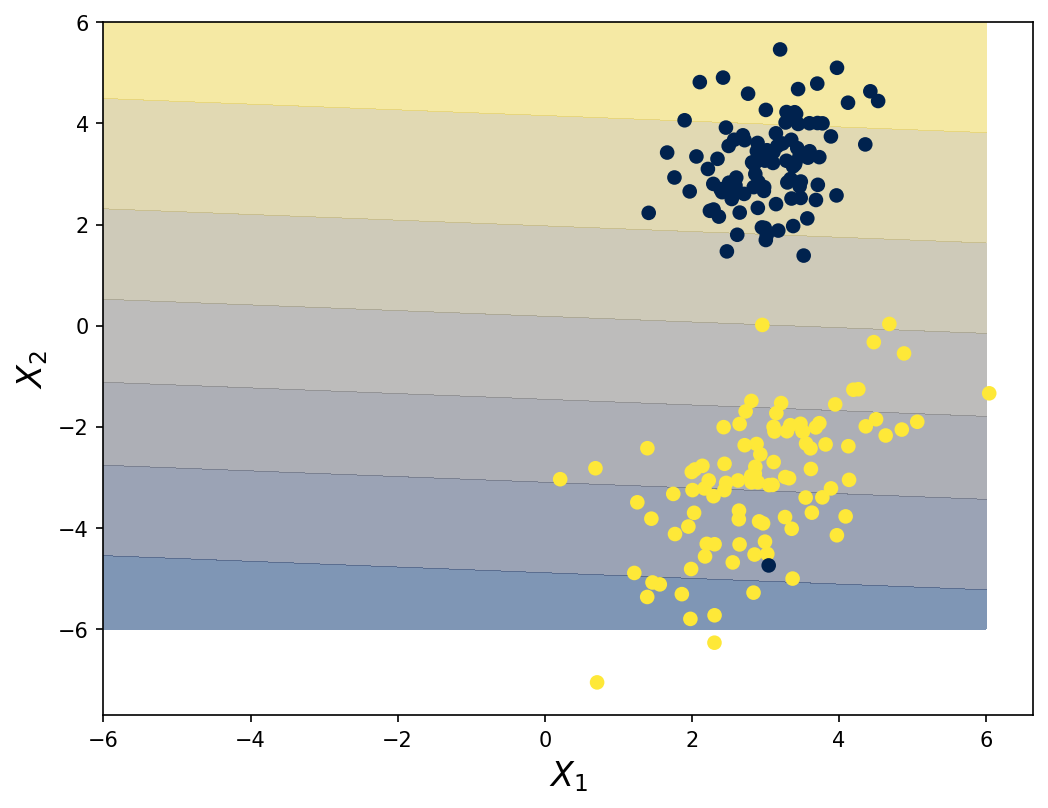

In [21]:
import matplotlib.pyplot as plt

def plot_decision_boundary(ax):
    N = 1000
    X_grid = np.meshgrid(np.linspace(-6,6,N),np.linspace(-6,6,N))
    X_grid2 = np.array([X_grid[0].flatten(),X_grid[1].flatten()])
    preds = model(torch.tensor(X_grid2.transpose()).float()).reshape((N, N)).detach()
    ax.contourf(X_grid[0],X_grid[1], preds, cmap = plt.cm.cividis, alpha = 0.5)
    ax.scatter(X[:,0],X[:,1],c = y, cmap = plt.cm.cividis)
    ax.set_xlabel('$X_1$',fontsize = 16)
    ax.set_ylabel('$X_2$',fontsize = 16)

fig, ax = plt.subplots(1,1,figsize = (8,6),dpi = 150)
plot_decision_boundary(ax)


We can then run the training for 25 epochs and plot this plot after each epoch:

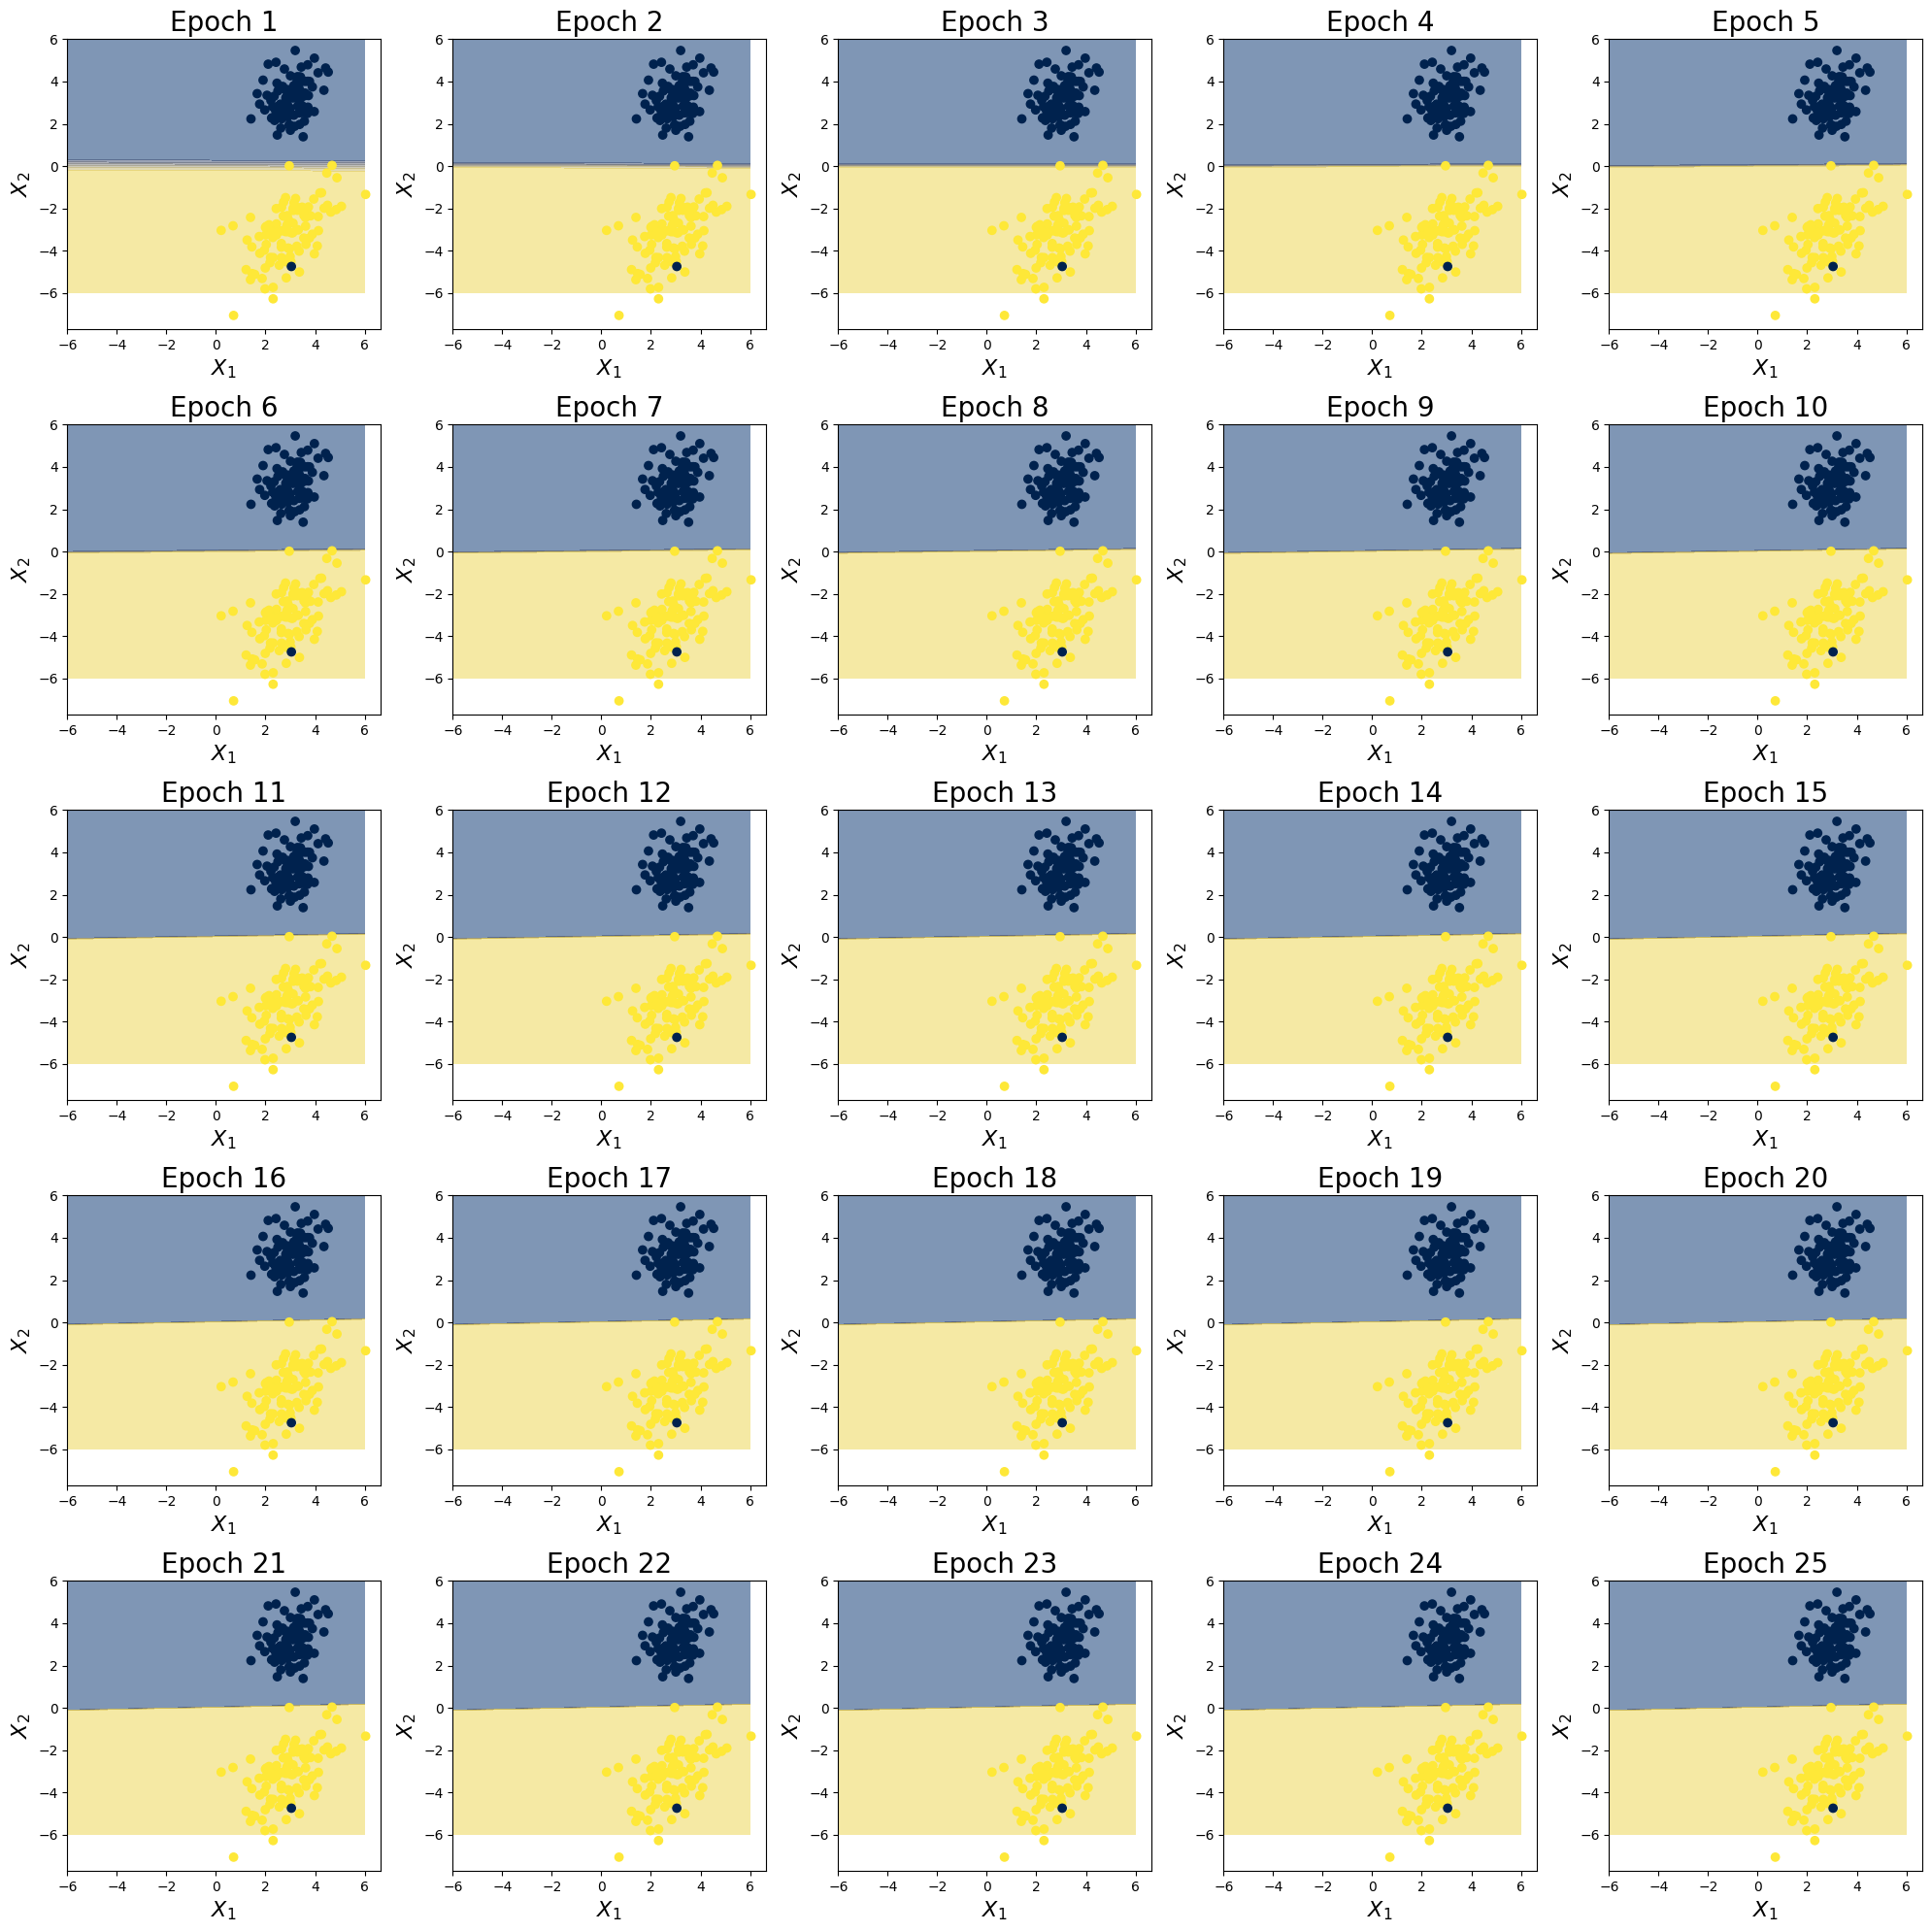

In [22]:
fig, ax = plt.subplots(5,5,figsize = (20,20))

tot_loss = []
for i in range(25):
    loss = train_epoch()
    tot_loss.append(loss)
    plot_decision_boundary(ax[int(i/5), i%5])
    ax[int(i/5),i%5].set_title('Epoch {}'.format(i+1),fontsize = 20)

fig.tight_layout()

We can see from these plots that the model improves (qualitatively) over time. To see more quantitatively how it improves over time, we can plot the loss as a function of epoch:

(0.0, 101.29966087341309)

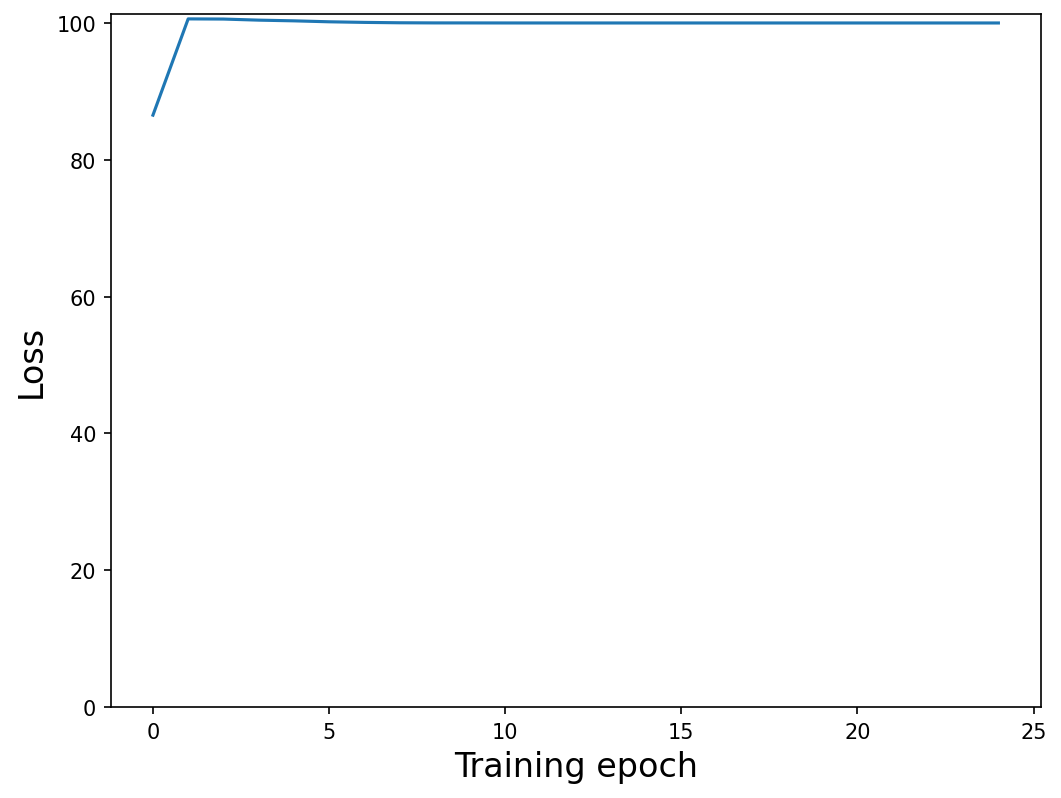

In [23]:
fig, ax = plt.subplots(1,1,figsize = (8,6),dpi = 150)
ax.plot(tot_loss)
ax.set_xlabel('Training epoch',fontsize = 16)
ax.set_ylabel('Loss',fontsize = 16)
ax.set_ylim(bottom = 0)

But wait: our binary cross entropy is increasing as we train? This is because our decision boundary is getting stricter and so because the datasets overlap, some points are misclassified and receive a large penalty in the loss. Unfortunately, we are limited in how well we can do with a single neuron; in fact, we can only linearly separate data. Instead, we need to go to a **deep** neural network with multiple layers.


## Adding more layers



As we previously discussed, we can add more linear layers into our model to improve the result. This type of model is referred to as a **multilayer perceptron**.

In [24]:
inputs = 2
outputs = 1
hidden = 30 # number of neurons in hidden layer

model = nn.Sequential(nn.Linear(2, 30), 
                      nn.ReLU(),
                      nn.Linear(30,1),
                      nn.Sigmoid())

<hr style="border:2px solid gray">

# Section Three: Activation Functions


<hr style="border:2px solid gray">

# Section Four: Exercises